In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
data = pd.read_csv('../data/train_encoded.tsv', sep="\t")
data.set_index('train_id', inplace=True)

print(test_data.shape)
print(data.shape)
print(stg2_data.shape)

# TRAIN_SIZE = 100000
# data = data.iloc[:TRAIN_SIZE]
# data.columns.values

NameError: name 'test_data' is not defined

In [ ]:
test_data.head()

In [4]:
data.head()

,price,shipping,item_description,name_and_brand,1,2,3,4,5,% Pure,...,Women's Golf Clubs,Wool,Work & Safety,Wrap,Wristlet,Writing,Yarn,Yoga & Pilates,Zipper,iPad
train_id,,,,,,,,,,,,,,,,,,,,,
0,10.0,1,No description yet,MLB Cincinnati Reds T Shirt Size XL nan,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52.0,0,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard Razer,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,1,Adorable top with a hint of lace and a key hol...,AVA-VIV Blouse Target,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues nan,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44.0,0,Complete with certificate of authenticity,24K GOLD plated rose nan,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Predspracovanie

### Separate Category to 3 categories

In [83]:
category_path_max = 3
data['categories'] = data['category_name'].apply(lambda x: x.split('/') if isinstance(x, str) else [np.nan,np.nan,np.nan])
for i in range(category_path_max):
  data[str(i) + '_category'] = data['categories'].apply(lambda x: x[i] if len(x) > i else np.nan)

data = data.drop(['categories', 'category_name'], 1)
data.head()

,name,item_condition_id,brand_name,price,shipping,item_description,0_category,1_category,2_category
train_id,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


### Brand name - all less than 4 appearances is other, combine with name

In [106]:
data["name_and_brand"] = data["name"].map(str) + ' ' + data["brand_name"].map(str)

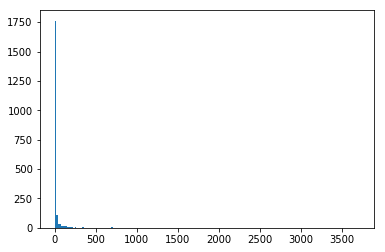

In [107]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

In [110]:
data.loc[data["brand_name"].isin(mask.index), "brand_name"] = "Other"
vc = data["brand_name"].value_counts() < 5
mask = pd.DataFrame(vc[vc])

data["brand_name"].value_counts()["Other"]

2286

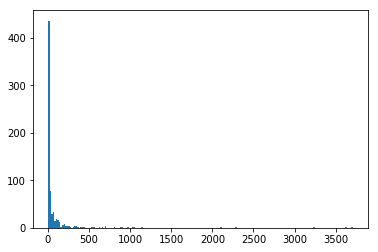

In [111]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

In [112]:
data = data.drop("name", axis=1)
data.head()

,item_condition_id,category_name,brand_name,price,shipping,item_description,name_and_brand
train_id,,,,,,,
0,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,MLB Cincinnati Reds T Shirt Size XL nan
1,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard Razer
2,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,AVA-VIV Blouse Target
3,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues nan
4,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,24K GOLD plated rose nan


### Brand name vectorized using Doc2Vec

In [6]:
import nltk
from nltk.stem.snowball import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import ToktokTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
data.head()

,price,shipping,item_description,name_and_brand,1,2,3,4,5,% Pure,...,Women's Golf Clubs,Wool,Work & Safety,Wrap,Wristlet,Writing,Yarn,Yoga & Pilates,Zipper,iPad
train_id,,,,,,,,,,,,,,,,,,,,,
0,10.0,1,No description yet,MLB Cincinnati Reds T Shirt Size XL nan,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52.0,0,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard Razer,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,1,Adorable top with a hint of lace and a key hol...,AVA-VIV Blouse Target,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues nan,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44.0,0,Complete with certificate of authenticity,24K GOLD plated rose nan,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ps = PorterStemmer()
tokenizer = ToktokTokenizer()

def normalize_text(words):
    norm = [ps.stem(text) for text in words]
    return norm
    
def tokenize(x):
    words = [tokenizer.tokenize(sent) for sent in sent_tokenize(x)]
    temp = [item for word in words for item in normalize_text(word)]
    return temp 

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

data["name_and_brands"] = data["name_and_brand"].apply(lambda x: tokenize(x))  

documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(data["name_and_brands"])]
documents[:5]

KeyboardInterrupt: 

In [148]:
start_alpha = 0.025
min_alpha = 0.008
epochs = 30
vector_size = 64
step = (start_alpha - min_alpha) / epochs

model = Doc2Vec(alpha=start_alpha, min_alpha=start_alpha, vector_size=32, window=5, workers=4)  # use fixed learning rate
model.build_vocab(documents)

for epoch in range(epochs):
    model.train(documents, total_examples=model.corpus_count, epochs=1)
    model.alpha -= step  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
    print(f'Epoch {epoch} finished. Alpha: {model.alpha}')


Epoch 0 finished. Alpha: 0.024433333333333335
Epoch 1 finished. Alpha: 0.023866666666666668
Epoch 2 finished. Alpha: 0.0233
Epoch 3 finished. Alpha: 0.022733333333333335
Epoch 4 finished. Alpha: 0.022166666666666668
Epoch 5 finished. Alpha: 0.0216
Epoch 6 finished. Alpha: 0.021033333333333334
Epoch 7 finished. Alpha: 0.020466666666666668
Epoch 8 finished. Alpha: 0.0199
Epoch 9 finished. Alpha: 0.019333333333333334
Epoch 10 finished. Alpha: 0.018766666666666668
Epoch 11 finished. Alpha: 0.0182
Epoch 12 finished. Alpha: 0.017633333333333334
Epoch 13 finished. Alpha: 0.017066666666666667
Epoch 14 finished. Alpha: 0.0165
Epoch 15 finished. Alpha: 0.015933333333333334
Epoch 16 finished. Alpha: 0.015366666666666667
Epoch 17 finished. Alpha: 0.0148
Epoch 18 finished. Alpha: 0.014233333333333334
Epoch 19 finished. Alpha: 0.013666666666666667
Epoch 20 finished. Alpha: 0.0131
Epoch 21 finished. Alpha: 0.012533333333333334
Epoch 22 finished. Alpha: 0.011966666666666667
Epoch 23 finished. Alpha: 0

In [151]:
rand_doc = random.randint(0, len(documents))
print(documents[rand_doc])
res_docs = model.docvecs.most_similar([rand_doc])
for doc_id, sim in res_docs:
    print(doc_id, sim, documents[doc_id])

TaggedDocument(['nar', 'copacabana', 'illumin', 'nar'], [33122])
1487 0.975306510925293 TaggedDocument(['nar', 'copacabana', 'illumin', 'nar'], [1487])
10651 0.9703717231750488 TaggedDocument(['nar', 'raquel', 'audaci', 'lipstick', 'nar'], [10651])
62952 0.9656898379325867 TaggedDocument(['credit', 'card', 'pocket', 'knife', 'nan'], [62952])
26896 0.9652498960494995 TaggedDocument(['rae', 'dunn', 'chirp', 'birdhous', 'rae', 'dunn'], [26896])
51753 0.9646904468536377 TaggedDocument(['nail', 'art', 'nan'], [51753])
66204 0.964483916759491 TaggedDocument(['nar', 'lip', 'pencil', 'nar'], [66204])
75726 0.964076042175293 TaggedDocument(['mac', 'lipgloss', 'mac', 'cosmet'], [75726])
68149 0.9637982249259949 TaggedDocument(['willow', 'tree', 'willow', 'tree'], [68149])
51077 0.9635478854179382 TaggedDocument(['similac', 'similac'], [51077])
39880 0.9635175466537476 TaggedDocument(['jewelri', 'holder', 'nan'], [39880])


In [156]:
model.wv.most_similar(['nike'])

[('adida', 0.8012651801109314),
 ('jordan', 0.7715709805488586),
 ('dri-fit', 0.7701272368431091),
 ('armour', 0.7467916011810303),
 ('puma', 0.7429763078689575),
 ('run', 0.7185765504837036),
 ('polo', 0.7013182640075684),
 ('gap', 0.6803188323974609),
 ('athlet', 0.6755757927894592),
 ('fila', 0.6728482842445374)]

### Description extract Doc2Vec